# Apply XGBoost (Extreme Gradient Boost) to Classification
- Reference: 
    - main body: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
    - Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/diabetes.csv/1
    - Tune hyperparameters: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [22]:
import pandas as pd
import xgboost as xgb
import sklearn
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


# Read Datasets

In [2]:
data = pd.read_csv('./datasets/step_0/diabetes.csv')

In [3]:
data.shape

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
X_data, y = data.iloc[:, :-1], data['Outcome']

In [7]:
type(X_data)

pandas.core.frame.DataFrame

In [8]:
X_data.shape

(768, 8)

In [9]:
y.shape

(768,)

In [10]:
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Split Dataset into Train/Test Datasets

In [12]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_data,
                                                                            y,
                                                                            test_size=0.3,
                                                                            random_state=7)

In [13]:
type(X_train)

pandas.core.frame.DataFrame

In [14]:
X_train.shape

(537, 8)

In [15]:
X_test.shape

(231, 8)

# Create XGBoost Class

#### Using Default Settings

In [16]:
SEED=27

model_default = xgb.XGBClassifier(seed=SEED)
%time model_default.fit(X_train, y_train)
pred = model_default.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, pred)

print()
print('Accuracy: {}'.format(accuracy))

CPU times: user 33.2 ms, sys: 4.15 ms, total: 37.4 ms
Wall time: 43.2 ms

Accuracy: 0.7792207792207793


In [17]:
print(sklearn.metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       147
           1       0.69      0.70      0.70        84

   micro avg       0.78      0.78      0.78       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



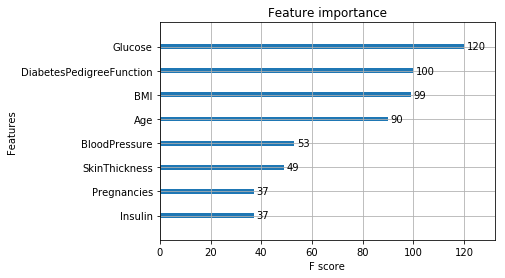

In [23]:
xgb.plot_importance(model_default)

#### Setting 2

In [18]:
model2 = xgb.XGBClassifier(n_estimators=100,  # number of trees you want to build.
                          max_depth=8,  # determines how deeply each tree is allowed to grow during any boosting round.
                          learning_rate=0.1,
                          subsample=0.5,   # percentage of samples used per tree. Low value can lead to underfitting.
                          seed=SEED)

%time model2.fit(X_train, y_train)

pred = model2.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, pred)

print()
print('Accuracy: {}'.format(accuracy))

CPU times: user 69 ms, sys: 0 ns, total: 69 ms
Wall time: 68.6 ms

Accuracy: 0.7402597402597403


In [19]:
print(sklearn.metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       147
           1       0.65      0.62      0.63        84

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



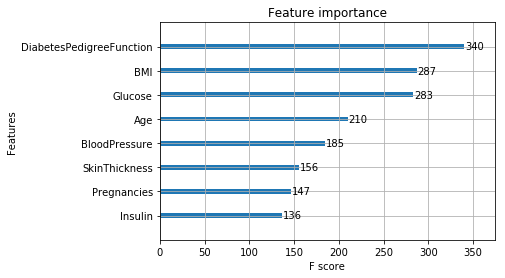

In [24]:
xgb.plot_importance(model2)

#### Setting 3

In [26]:
min_child_weight = 1 # minimum sum of weights of all observations required in a child. High value can lead to overfitting.
gamma = 0 # control whether a given node will split based on the expected reduction in loss after a split. A higher value leads to fewer splits. Supported only for tree-based learners.
scale_pos_weight = 1 # A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.

model3 = xgb.XGBClassifier(learning_rate=0.1,
                         n_estimators=1000, # number of trees you want to build.
                         max_depth=5, # how deeply each tree is allowed to grow during each boosting round.
                         min_child_weight=min_child_weight, 
                         gamma=gamma, 
                         subsample=0.8, # percentage of samples used per tree. Low value can lead to underfitting.
                         colsample_bytree=0.8, # percentage of features used per tree. High value can lead to overfitting.
                         objective='binary:logistic',
                         nthread=4,
                         scale_pos_weight=scale_pos_weight,
                         seed=SEED)

%time model3.fit(X_train, y_train)

pred = model3.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, pred)

print()
print('Accuracy: {}'.format(accuracy))

print(sklearn.metrics.classification_report(y_test, pred))

CPU times: user 796 ms, sys: 404 ms, total: 1.2 s
Wall time: 603 ms

Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       147
           1       0.61      0.60      0.60        84

   micro avg       0.71      0.71      0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231



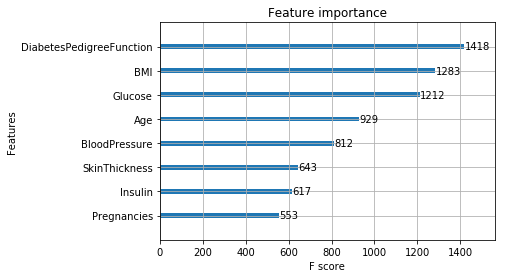

In [27]:
xgb.plot_importance(model3)

### Model 4 using Grid Search Cross-Validation

In [39]:
param_test = {'max_depth': [4, 5, 6], # max depth of a tree, typical value: 3-10
             'min_child_weight': [4, 5, 6]}    # min sum of weights of all observations required in a child. Too high value can lead to underfitting.

min_child_weight = 2
gamma = 0 # controls whether a given node will split based on the expected reduction in loss after the split. A higher value lead to fewer split. Supported only for tree-based learners.
scale_pos_weight = 1 # A value greater than 0 should used in case of high class imbalance as it helps in faster convergence.

model4 = xgb.XGBClassifier(learning_rate=0.1,
                          n_estimators=140, # number of trees you want to build
                          max_depth=5, # how deeply each tree is allowed to grow during boosting round.
                          min_child_weight=min_child_weight, 
                          gamma=gamma,
                          subsample=0.8, # percentage of samples used per tree. Low value can lead to underfitting.
                          colsample_bytree=0.8, # percentage of features used per tree. High value can lead to overfiting.
                          objective='binary:logistic',
                          n_thread=4,
                          scale_pos_weight=scale_pos_weight,
                          seed=SEED)

gsearch = sklearn.model_selection.GridSearchCV(estimator=model4,
                                              param_grid=param_test,
                                              scoring='roc_auc',
                                              n_jobs=4,
                                              iid=False,
                                              cv=5)

%time train_model4 = gsearch.fit(X_train, y_train)
pred = train_model4.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, pred)
print()
print('Accuracy: {}'.format(accuracy))

print(sklearn.metrics.classification_report(y_test, pred))

CPU times: user 215 ms, sys: 26.5 ms, total: 241 ms
Wall time: 4.08 s

Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       147
           1       0.65      0.61      0.63        84

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [29]:
type(train_model4)

sklearn.model_selection._search.GridSearchCV

In [30]:
train_model4.best_params_

{'max_depth': 4, 'min_child_weight': 6}

In [32]:
type(train_model4.best_estimator_)

xgboost.sklearn.XGBClassifier

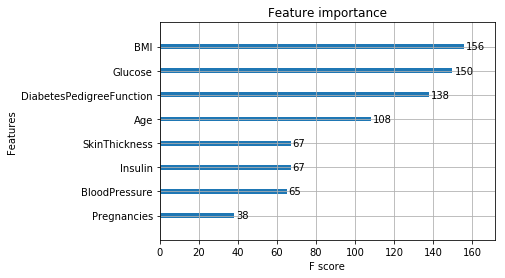

In [33]:
xgb.plot_importance(train_model4.best_estimator_)

### Model 5 using Grid-Search Cross-Validation

In [35]:
param_test2b = {'min_child_weight': [6, 8, 10, 12]}  # min sum of weights of all observations required in a tree. Too high values can lead to underfitting.

model5 = xgb.XGBClassifier(learing_rate=0.1,
                          n_estimator=140,  # number of trees you want to build.
                          max_depth=4, # max depth of each tree is allowed to grow during any boosting round.
                          min_child_weight=2,
                          gamma=0, # A node is split only when the resulting split gives a positive reduction in the loss function with value gamma.
                          subsample=0.8, # percentage of observations to be randomly sampled for each tree.
                          colsample_bytree=0.8, # percentage of features to be randomly sampled for each tree.
                          objective='binary:logistic',
                          n_thread=4,
                          scale_pos_weight=1, # A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.
                          seed=SEED)

gsearch2b = sklearn.model_selection.GridSearchCV(estimator=model5,
                                                param_grid=param_test2b,
                                                scoring='roc_auc',
                                                n_jobs=4,
                                                iid=False,
                                                cv=5)

%time train_model5 = gsearch2b.fit(X_train, y_train)

pred = train_model5.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, pred)

print()
print('Accuracy: {}'.format(accuracy))

print(sklearn.metrics.classification_report(y_test, pred))

CPU times: user 82.2 ms, sys: 2.05 ms, total: 84.2 ms
Wall time: 583 ms

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       147
           1       0.67      0.63      0.65        84

   micro avg       0.75      0.75      0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [36]:
train_model5.best_params_

{'min_child_weight': 10}

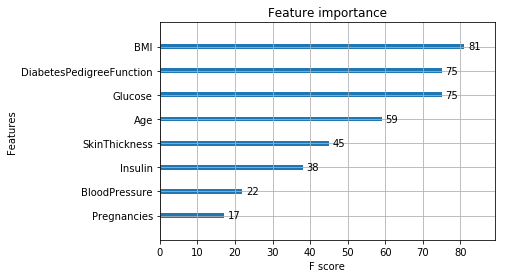

In [37]:
xgb.plot_importance(train_model5.best_estimator_)

# Model 6: Tune gamm

In [ ]:
param_test3 = {'gamma': [i/10.0 for i in range(0, 5)]}  # 

